In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-sales-dataset/Coffe_sales.csv


Instalujemy odpowiednie biblioteki

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


Następnie wczytujemy nasze dane i wyświetlamy podstawowe informacje na ich temat np. 

In [5]:
data = pd.read_csv("/kaggle/input/coffee-sales-dataset/Coffe_sales.csv")
data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


Sprawdzamy, jakie typy kaw są w sprzedaży i ile kaw danego typu zostało sprzedanych ogółem.

In [12]:
data["coffee_name"].unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

In [13]:
ile = data["coffee_name"].value_counts()
ile

coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64

In [14]:
# Najlepiej sprzedający się produkt
top_produkty = data.groupby('coffee_name').size().sort_values(ascending=False) #size zlicza liczbe wierszy
print("Ranking produktów:",top_produkty)

Ranking produktów: coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
dtype: int64


Widzimy, że najlepiej sprzedającym się produktem jest Americano z mlekiem, łącznie aż 809 sztuk tej kawy zostało sprzedanych.

In [15]:
#ranking wg przychodu
data.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Americano              14650.26
Hot Chocolate           9933.46
Cocoa                   8521.16
Cortado                 7384.86
Espresso                2690.28
Name: money, dtype: float64

In [16]:
data.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Americano              14650.26
Hot Chocolate           9933.46
Cocoa                   8521.16
Cortado                 7384.86
Espresso                2690.28
Name: money, dtype: float64

In [17]:
sprzedaz_miesiac_kawa = data.groupby(['Month_name', 'coffee_name']).size().reset_index(name='Liczba_sprzedanych')
sprzedaz_miesiac_kawa

,Month_name,coffee_name,Liczba_sprzedanych
0,Apr,Americano,33
1,Apr,Americano with Milk,38
2,Apr,Cappuccino,36
3,Apr,Cocoa,4
4,Apr,Cortado,16
...,...,...,...
91,Sep,Cocoa,9
92,Sep,Cortado,41
93,Sep,Espresso,12
94,Sep,Hot Chocolate,11


In [18]:
sprz_maj = sprzedaz_miesiac_kawa[sprzedaz_miesiac_kawa['Month_name'] == 'May']
sprz_maj

,Month_name,coffee_name,Liczba_sprzedanych
64,May,Americano,40
65,May,Americano with Milk,54
66,May,Cappuccino,52
67,May,Cocoa,8
68,May,Cortado,17
69,May,Espresso,7
70,May,Hot Chocolate,13
71,May,Latte,50


Text(0.5, 1.0, 'Ranking najlepiej sprzedających się kaw')

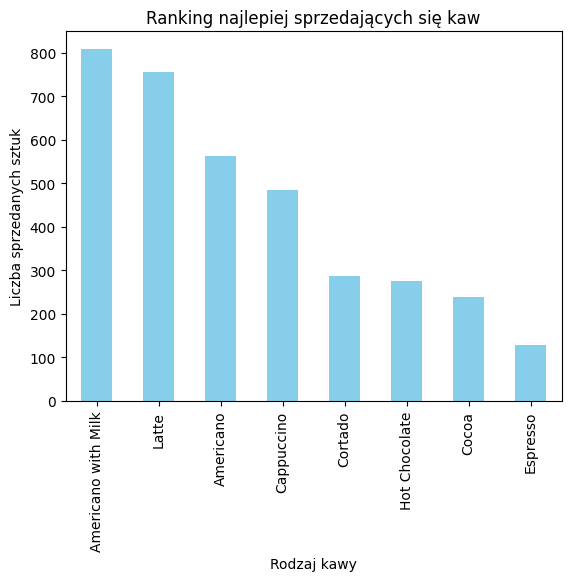

In [24]:
top_produkty.plot(kind='bar', color='skyblue')
plt.xlabel("Rodzaj kawy")
plt.ylabel("Liczba sprzedanych sztuk")
plt.title("Ranking najlepiej sprzedających się kaw")

Ranking wg ilości:
 coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
dtype: int64

Ranking wg przychodu:
 coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Americano              14650.26
Hot Chocolate           9933.46
Cocoa                   8521.16
Cortado                 7384.86
Espresso                2690.28
Name: money, dtype: float64


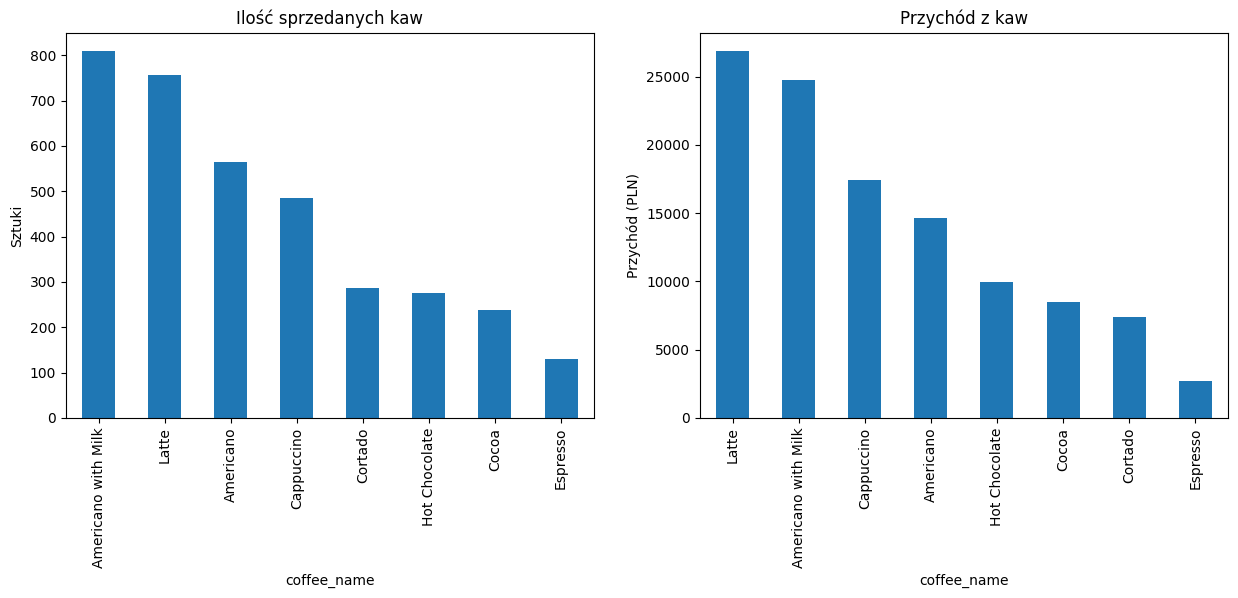

In [25]:
ranking_ilosc = data.groupby('coffee_name').size().sort_values(ascending=False)
ranking_przychod = data.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

print("Ranking wg ilości:\n", ranking_ilosc)
print("\nRanking wg przychodu:\n", ranking_przychod)

# Możesz użyć subplotów, aby narysować oba wykresy obok siebie do porównania
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ranking_ilosc.plot(kind='bar', ax=axes[0], title='Ilość sprzedanych kaw')
ranking_przychod.plot(kind='bar', ax=axes[1], title='Przychód z kaw')
axes[0].set_ylabel('Sztuki')
axes[1].set_ylabel('Przychód (PLN)')

plt.show()

Z powyższych wykresów możemy zauważyć, że Americano z mlekiem jest najczęściej zamawianą kawą, natomiast największy zysk przynosi kawa Latte. Z kolei Espresso jest zdecydowanie najrzadziej kupowane i generuje najmniej przychodu. 

Teraz sprawdzimy w jakich godzinach ludzie najczęściej kupują kawę.

In [26]:
godziny_szczytu = data.groupby('hour_of_day').size().sort_values(ascending=False)
godziny_szczytu

hour_of_day
10    328
11    283
16    278
9     242
12    241
17    237
15    236
8     235
19    229
14    225
13    225
18    218
21    195
20    169
22    113
7      88
6       5
dtype: int64

Wyniki zostały posortowane od największej do najmniejszej ilości sprzedanych kaw. Z powyższego wynika, iż najwięcej kaw sprzedaje się w godzinach 10,11 oraz 16. Z kolei między godziną 6 i 7 rano odnotowano najmniejszą sprzedaż.

Teraz posortujmy nasze wyniki tak, by godziny otwarcia kawiarni były w poprawnej kolejności.

In [27]:
godziny_szczytu.sort_index()

hour_of_day
6       5
7      88
8     235
9     242
10    328
11    283
12    241
13    225
14    225
15    236
16    278
17    237
18    218
19    229
20    169
21    195
22    113
dtype: int64

Ilość kupowanych kaw w zależności od godziny dnia możemy zobrazować na wykresie liniowym:

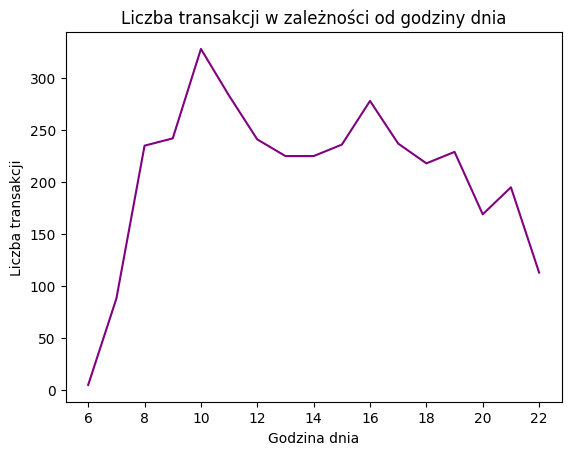

In [33]:
godziny_szczytu.sort_index().plot(kind='line', color='purple')
plt.title('Liczba transakcji w zależności od godziny dnia')
plt.xlabel('Godzina dnia')
plt.ylabel('Liczba transakcji')
plt.show()

Możemy także przeanalizować w jaki dzień tygodnia sprzedało się najwięcej kaw. 

In [30]:
dzien = data.groupby('Weekday').size().sort_values(ascending=False)
dzien

Weekday
Tue    572
Mon    544
Fri    532
Thu    510
Wed    500
Sat    470
Sun    419
dtype: int64

Text(0.5, 1.0, 'Liczba sprzedanych kaw w zależności od dnia tygodnia')

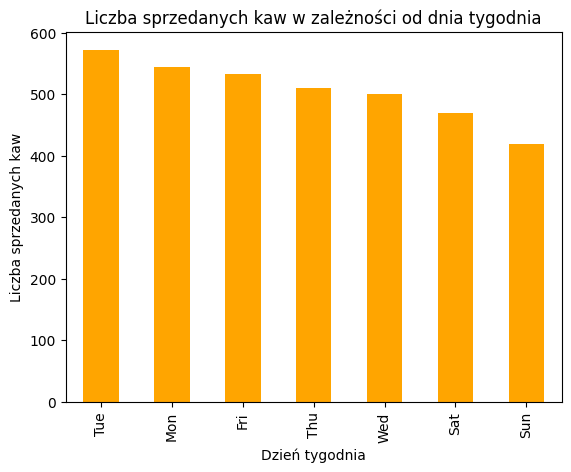

In [31]:
dzien.plot(kind = 'bar', color = 'orange')
plt.xlabel("Dzień tygodnia")
plt.ylabel("Liczba sprzedanych kaw")
plt.title("Liczba sprzedanych kaw w zależności od dnia tygodnia")

In [ ]:
dzien.plot(kind='bar', color='orange')
plt.xlabel("Dzień tygodnia")
plt.ylabel("Liczba sprzedanych kaw")
plt.title("Ranking najlepiej sprzedających się kaw")

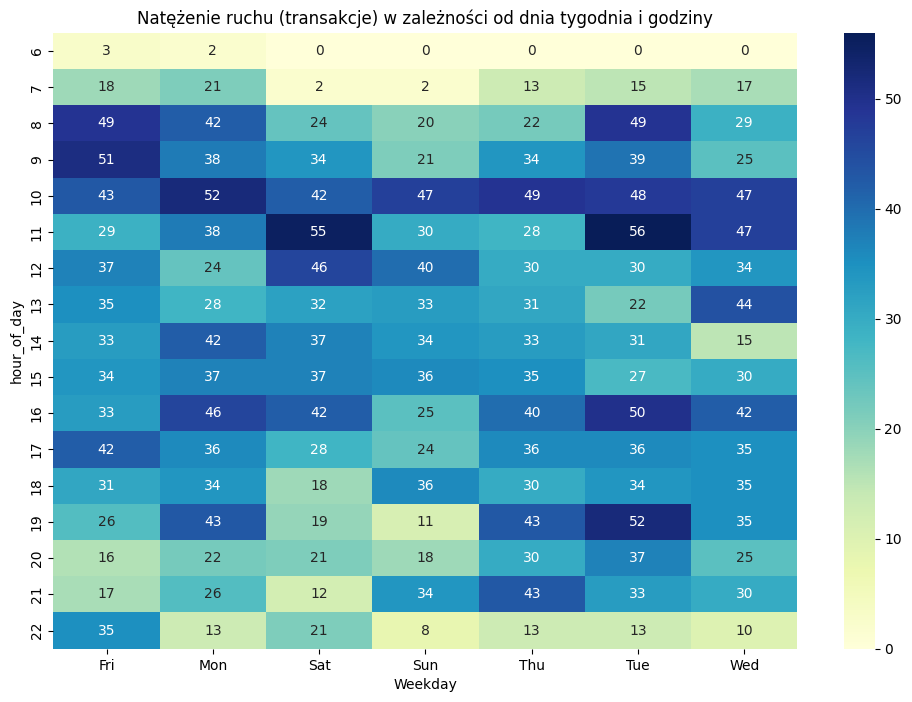

In [29]:
plt.figure(figsize=(12, 8))
heatmap_data = data.pivot_table(
    index='hour_of_day',
    columns='Weekday',
    values='money',
    aggfunc='count'
).fillna(0)

sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='g')
plt.title('Natężenie ruchu (transakcje) w zależności od dnia tygodnia i godziny')
plt.show()